# Gradient descent in 2D with (and without) momentum
Perform gradient descent on 
$$z = \epsilon x^2 + y^4$$
for $\epsilon \ll 1$.

The purpose is to motivate gradient descent with momentum.

---
tags: pytorch, optimization, gradient descent, visualization, gradient vector field, momentum

# Imports

In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

# Parameters

In [2]:
epsilon = .1
y_power = 2

lr = .1
n_epochs = 35

# Function to minimize

In [3]:
def func(x, y):
    return epsilon*(x*x) + y.pow(y_power)

# Data

In [4]:
# x- and y-grid
x_min, x_max, y_min, y_max = -1, 1, -1, 1
nx, ny = 5, 11
y, x = np.mgrid[y_min:y_max:ny*1j, x_min:x_max:nx*1j]
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)

z = func(x, y)
z.backward(torch.ones_like(z))
gradf_x, gradf_y = x.grad, y.grad

# Steepest gradient descent

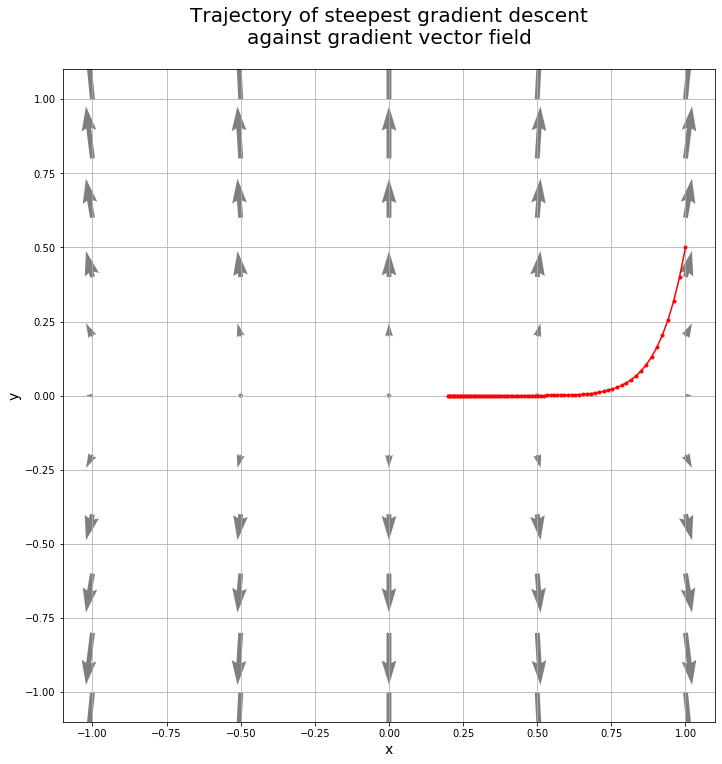

In [5]:
x0, y0 = torch.tensor([1.], requires_grad=True), torch.tensor([.5], requires_grad=True) # initial point, will be updated

optimizer = torch.optim.SGD([x0, y0], lr=lr)

n_epochs = 80
x_traj = np.array(x0.data)
y_traj = np.array(y0.data)

for _ in range(n_epochs):
    optimizer.zero_grad()
    z0 = func(x0, y0)
    z0.backward()
    optimizer.step()
    x_traj = np.concatenate([x_traj, np.array(x0.data)], axis=0)
    y_traj = np.concatenate([y_traj, np.array(y0.data)], axis=0) 

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect('equal')


X = x.detach().numpy()
Y = y.detach().numpy()
U = gradf_x.detach().numpy()
V = gradf_y.detach().numpy()

sc = .2


ax.quiver(X, Y, sc*U, sc*V, alpha=.5)
ax.plot(x_traj, y_traj, color='r', marker='.')

ax.grid();
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14);
ax.set_title("Trajectory of steepest gradient descent\nagainst gradient vector field", fontsize=20, y=1.03);

# Steepest gradient descent with momentum

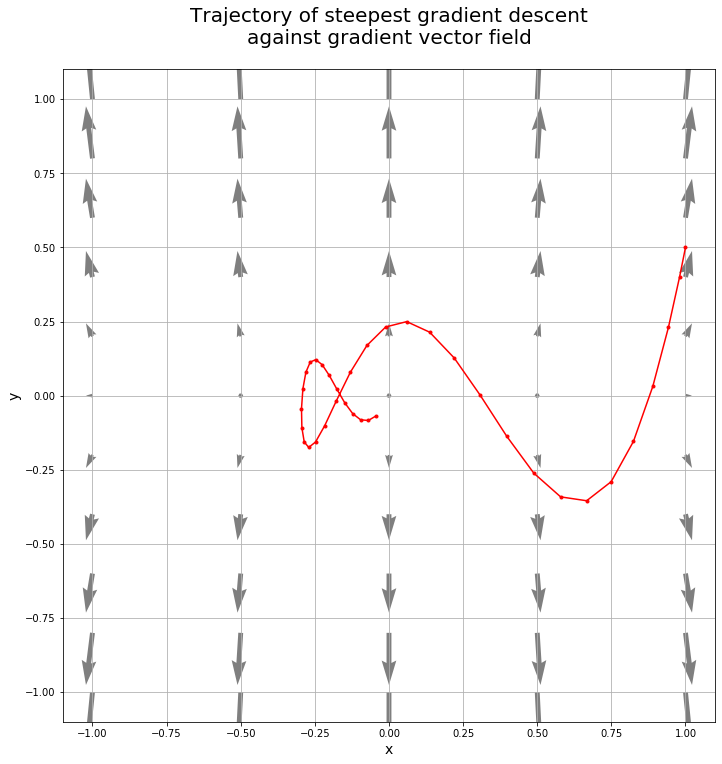

In [6]:
x0, y0 = torch.tensor([1.], requires_grad=True), torch.tensor([.5], requires_grad=True) # initial point, will be updated

optimizer = torch.optim.SGD([x0, y0], lr=lr, momentum=.9)

n_epochs = 35
x_traj = np.array(x0.data)
y_traj = np.array(y0.data)

for _ in range(n_epochs):
    optimizer.zero_grad()
    z0 = func(x0, y0)
    z0.backward()
    optimizer.step()
    x_traj = np.concatenate([x_traj, np.array(x0.data)], axis=0)
    y_traj = np.concatenate([y_traj, np.array(y0.data)], axis=0) 

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect('equal')


X = x.detach().numpy()
Y = y.detach().numpy()
U = gradf_x.detach().numpy()
V = gradf_y.detach().numpy()

sc = .2


ax.quiver(X, Y, sc*U, sc*V, alpha=.5)
ax.plot(x_traj, y_traj, color='r', marker='.')

ax.grid();
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14);
ax.set_title("Trajectory of steepest gradient descent\nagainst gradient vector field", fontsize=20, y=1.03);